In [1]:
import requests
import pandas as pd

In [2]:
list_suburbs = ['Aberfeldy','Agnes','Allambee','Almurta','Anderson', 'Arawata', 'Archies Creek', 'Athlone', 'Bass', 'Baw Baw', 
 'Bena', 'Berrys Creek', 'Bona Vista', 'Boolarra', 'Boolarra South', 'Brandy Creek', 'Budgeree', 'Buffalo', 'Buln Buln', 'Callignee', 'Cape Woolamai', 'Childers', 'Churchill', 
'Cloverlea', 'Coalville', 'Corinella', 'Coronet Bay', 'Cowes', 'Crossover', 'Dalyston','Darnum', 'Delburn', 'Dollar', 'Driffield', 'Drouin', 'Drouin West', 'Dudley', 'Dumbalk',
 'Ellinbank', 'Erica', 'Ferndale', 'Fish Creek', 'Flynn', 'Foster', 'French Island', 'Fumina', 'Glen Forbes',
'Glengarry', 'Grantville', 'Hallora', 'Hallston', 'Hazel Park', 'Hazelwood', 'Hedley', 'Hill End', 'Icy Creek', 'Inverloch', 
'Jam Jerrup', 'Jeeralang', 'Jeeralang Junction', 'Jeetho', 'Jindivick', 'Jumbuk', 'Jumbunna', 'Kardella', 'Kernot', 'Kilcunda', 'Kongwak', 'Koonwarra', 'Koornalla', 'Korumburra', 'Krowera', 'Labertouche', 'Lardner', 'Leongatha',
 'Lillico', 'Loch', 'Longwarry', 'Mardan', 'McMahons Creek', 'Meeniyan', 'Mirboo', 'Mirboo North', 'Modella', 'Moe', 'Morwell', 'Narracan', 'Nayook', 'Neerim', 'Neerim South',
 'Newborough', 'Newhaven', 'Nilma', 'Nilma North', 'Noojee', 'North Wonthaggi', 'Nyora', 'Outtrim', 'Phillip Island', 'Piedmont', 'Pioneer Bay', 'Poowong', 'Port Franklin', 'Port Welshpool', 'Ranceby', 'Rawson', 'Rhyll','Rokeby', 'Ruby',
 'San Remo', 'Sandy Point', 'Shady Creek', 'Silverleaves', 'South Dudley', 'Stony Creek', 'Strzelecki', 'Sunderland Bay', 'Sunset Strip', 'Surf Beach', 'Tanjil Bren', 'Tanjil South', 'Tarwin', 'Tarwin Lower', 'Tenby Point', 'The Gurdies', 
'Thorpdale', 'Toongabbie', 'Toora', 'Torwood', 'Trafalgar', 'Trafalgar East', 'Trafalgar South', 'Traralgon', 'Traralgon South', 'Trida', 'Turtons Creek', 'Tyers', 'Ventnor', 'Venus Bay', 'Vesper', 'Walhalla', 'Walkerville', 'Waratah Bay', 'Warragul',
'Wattle Bank', 'Welshpool', 'West Creek', 'Westbury', 'Willow Grove', 'Wimbledon Heights', 'Wonga', 'Wonthaggi', 'Woodleigh',  'Woolamai',
'Yallourn', 'Yallourn North', 'Yanakie', 'Yarragon', 'Yinnar', 'Yinnar South']


In [3]:
sub = pd.read_csv('suburbs.csv')

In [4]:
sub.head()

,Locality Name,Post Code,Municipality Name
0,Abbeyard,3737,Alpine Shire Council
1,Abbotsford,3067,Yarra City Council
2,Aberfeldie,3040,Moonee Valley City Council
3,Aberfeldy,3825,Baw Baw Shire Council
4,Acheron,3714,Murrindindi Shire Council


In [6]:
sub.tail()

,Locality Name,Post Code,Municipality Name
3221,Yulecart,3301,Southern Grampians Shire Council
3222,Yundool,3727,Moira Shire Council
3223,Yuroke,3063,Hume City Council
3224,Yuulong,3237,Colac Otway Shire Council
3225,Zeerust,3634,Greater Shepparton City Council


In [7]:
len(sub)

3226

In [8]:
sub.drop(index=sub[~sub['Locality Name'].isin(list_suburbs) ].index, inplace=True)
sub.reset_index(inplace=True, drop=True)

In [9]:
sub[sub.duplicated()]

,Locality Name,Post Code,Municipality Name


In [10]:
sub.to_csv('temp.csv')

In [11]:
suburbs = []
lat = []
lon = []
temp = []
wind_speed = []
description = []
post_code = []
for i in range(len(sub)):
    url = "http://api.openweathermap.org/data/2.5/weather?zip={}&appid=79ab7afe9488e5e8236e3054f20c6947".format(str(sub['Post Code'][i])+",au")
    print(url)
    res = requests.get(url)
    data = res.json()
    suburbs.append(str(sub['Locality Name'][i]))
    print(data)
#     for j in data:
#         print(data['coord'])
    postcode = str(sub['Post Code'][i])
    latitude = data['coord']['lat']
    longitude = data['coord']['lon']
    temperature = data['main']['temp']
    wind = data['wind']['speed']
    post_code.append(postcode)
    lat.append(latitude)
    lon.append(longitude)
    temp.append(temperature)
    wind_speed.append(wind)
#     data_frame['temp'][i] = data['main']['temp']
        
    weather_access = data['weather']
    for weather_data in weather_access:
        desc = weather_data['description']
        description.append(desc)
#         print(description)


http://api.openweathermap.org/data/2.5/weather?zip=3825,au&appid=79ab7afe9488e5e8236e3054f20c6947
{'coord': {'lon': 146.4, 'lat': -37.95}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 285.9, 'feels_like': 284.37, 'temp_min': 285.37, 'temp_max': 286.48, 'pressure': 1023, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 2.16, 'deg': 345}, 'clouds': {'all': 0}, 'dt': 1598693121, 'sys': {'type': 3, 'id': 2021657, 'country': 'AU', 'sunrise': 1598647246, 'sunset': 1598687424}, 'timezone': 36000, 'id': 0, 'name': 'Rawson', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?zip=3962,au&appid=79ab7afe9488e5e8236e3054f20c6947
{'coord': {'lon': 146.39, 'lat': -38.56}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 286.23, 'feels_like': 284.25, 'temp_min': 284.82, 'temp_max': 287.59, 'pressure': 1020, 'humidity': 62}, 'visibility':

In [12]:
 data_frame = pd.DataFrame(data=zip(suburbs, post_code, lat, lon, temp, description, wind_speed),columns=['Suburbs','Post Code', 'Latitude','Longitude', 'Temperature', 'Description', 'Wind'  ])

In [13]:
data_frame.head()

,Suburbs,Post Code,Latitude,Longitude,Temperature,Description,Wind
0,Aberfeldy,3825,-37.95,146.40,285.90,clear sky,2.16
1,Agnes,3962,-38.56,146.39,286.23,clear sky,1.50
2,Allambee,3823,-38.21,146.06,286.19,clear sky,0.67
3,Almurta,3979,-38.52,145.70,287.38,clear sky,4.07
4,Anderson,3995,-38.57,145.70,287.38,clear sky,4.86


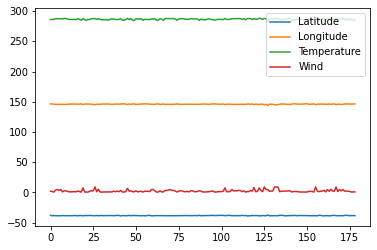

In [15]:
import matplotlib.pyplot as plt
data_frame.plot()
plt.show(block=True)

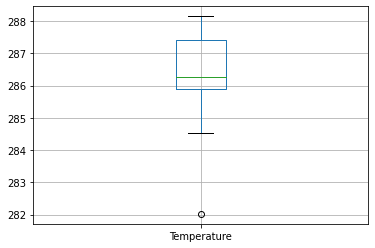

In [20]:
data_frame.boxplot(column=['Temperature'])

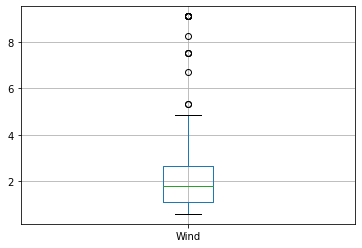

In [22]:
data_frame.boxplot(column=['Wind'])